
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**Download the fashion mnist dataset using Keras.**

In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [4]:
print("There are ", len(x_train),"images in the training dataset") 
print("There are ", len(x_test),"images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

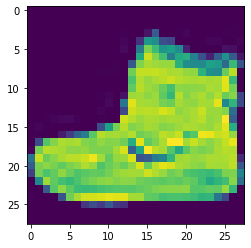

In [6]:
plt.imshow(x_train[0])

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [7]:
x_train[5].min()

0

In [8]:
x_train[5].max()

255

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

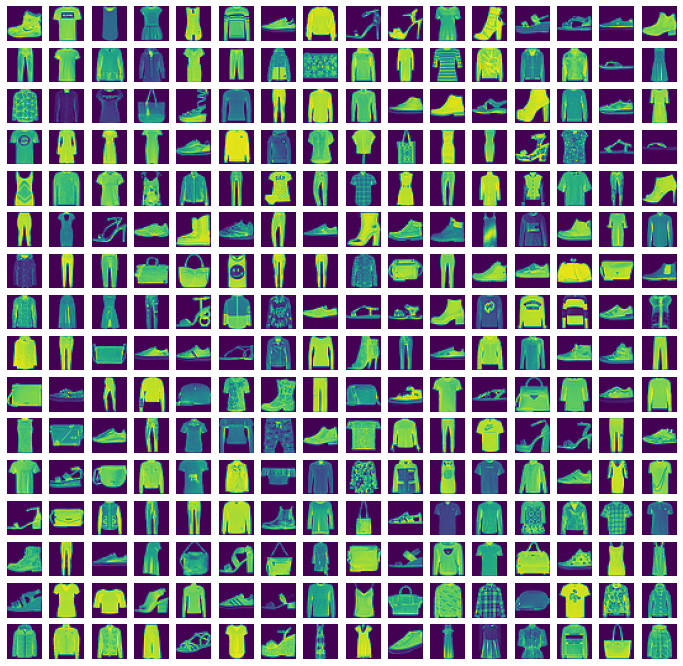

In [10]:
plt.figure(figsize= (12,12))
for i in range(256):
  plt.subplot(16,16,i+1)
  plt.axis('off')
  plt.imshow(x_train[i])

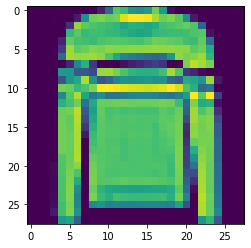

In [11]:

plt.imshow(x_train[5])

**Reshape the X into 4 dimension**

In [12]:
x_train = x_train.reshape(x_train.shape[0],28, 28,1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

model.add(Conv2D(filters=28,kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 28)        7084      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 13552)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1734784   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 200s 106ms/step - loss: 0.3850 - accuracy: 0.8609 - val_loss: 0.3060 - val_accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 213s 114ms/step - loss: 0.2616 - accuracy: 0.9059 - val_loss: 0.2777 - val_accuracy: 0.9017
Epoch 3/10
1875/1875 [==============================] - 199s 106ms/step - loss: 0.2301 - accuracy: 0.9181 - val_loss: 0.2689 - val_accuracy: 0.9127
Epoch 4/10
1875/1875 [==============================] - 172s 92ms/step - loss: 0.2122 - accuracy: 0.9250 - val_loss: 0.2792 - val_accuracy: 0.9052
Epoch 5/10
1875/1875 [==============================] - 189s 101ms/step - loss: 0.1949 - accuracy: 0.9304 - val_loss: 0.2960 - val_accuracy: 0.9054


In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
model.history.history

{'loss': [0.3849833905696869,
  0.26163342595100403,
  0.23007351160049438,
  0.21216951310634613,
  0.19486431777477264],
 'accuracy': [0.860883355140686,
  0.9059333205223083,
  0.9180833101272583,
  0.925000011920929,
  0.9304166436195374],
 'val_loss': [0.30596253275871277,
  0.2776811718940735,
  0.26891374588012695,
  0.27922379970550537,
  0.2959522306919098],
 'val_accuracy': [0.8948000073432922,
  0.9017000198364258,
  0.9126999974250793,
  0.9052000045776367,
  0.9053999781608582]}

In [24]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.384983,0.860883,0.305963,0.8948
1,0.261633,0.905933,0.277681,0.9017
2,0.230074,0.918083,0.268914,0.9127
3,0.212170,0.925000,0.279224,0.9052
4,0.194864,0.930417,0.295952,0.9054


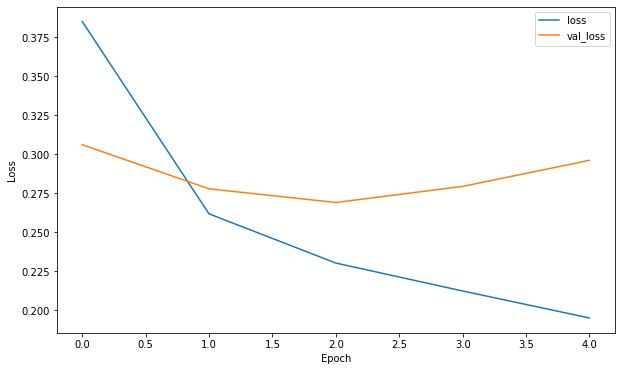

In [25]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

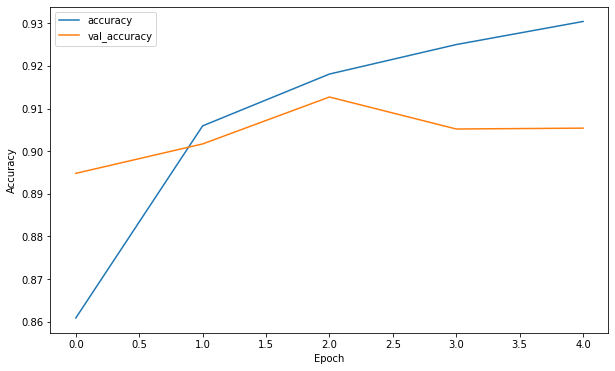

In [26]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [27]:
print(model.evaluate(x_test,Y_test,verbose=1))

313/313 [==============================] - 6s 18ms/step - loss: 0.2960 - accuracy: 0.9054
[0.2959522306919098, 0.9053999781608582]


In [28]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [29]:
preds = model.predict(x_test)

In [30]:
predictions= np.argmax(preds, axis=1)

In [31]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.86      0.85      1000
           3       0.92      0.92      0.92      1000
           4       0.88      0.86      0.87      1000
           5       0.99      0.95      0.97      1000
           6       0.76      0.68      0.71      1000
           7       0.93      0.98      0.96      1000
           8       0.95      0.99      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.90      0.91      0.90     10000
weighted avg       0.90      0.91      0.90     10000



In [33]:
print(confusion_matrix(y_test, predictions))

[[883   2  15  13   1   2  74   1   9   0]
 [  2 976   1  15   1   0   1   0   4   0]
 [ 25   0 864   5  45   1  57   0   3   0]
 [ 12   5  15 921  25   0  17   0   5   0]
 [  0   1  53  19 856   1  65   0   5   0]
 [  0   0   0   0   0 948   0  36   0  16]
 [147   2  76  29  45   0 676   0  25   0]
 [  0   0   0   0   0   2   0 978   0  20]
 [  3   0   2   1   0   2   1   2 987   2]
 [  0   0   0   0   0   5   0  30   0 965]]


In [34]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2959522306919098
Test accuracy: 0.9053999781608582


In [35]:
my_image = x_test[44]

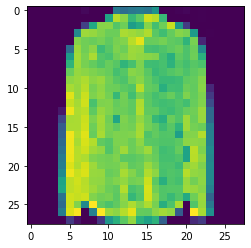

In [36]:
plt.imshow(my_image)

In [37]:
image_prediction=model.predict(my_image.reshape(1,28,28,1))

In [38]:
np.argmax(image_prediction, axis=1)

array([6], dtype=int64)

In [39]:
result=np.argmax(image_prediction, axis=1)
classes[result[0]]

'Shirt'

In [40]:
model.save("cnn-1_assignment.h5")

In [41]:
early_stop = EarlyStopping(monitor='val_loss',patience=15)

In [42]:
from keras.layers import Dropout

In [43]:
model= Sequential()
model.add(Conv2D(filters=28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2),strides=(1,1)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))
        
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2),strides=(1,1)))
model.add(Dropout(0.3))
        
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 28)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        16192     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

In [45]:

model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 251s 134ms/step - loss: 0.4535 - accuracy: 0.8336 - val_loss: 0.3579 - val_accuracy: 0.8697
Epoch 2/100
1875/1875 [==============================] - 235s 125ms/step - loss: 0.3008 - accuracy: 0.8891 - val_loss: 0.3022 - val_accuracy: 0.8889
Epoch 3/100
1875/1875 [==============================] - 233s 124ms/step - loss: 0.2626 - accuracy: 0.9028 - val_loss: 0.2704 - val_accuracy: 0.9016
Epoch 4/100
1875/1875 [==============================] - 243s 129ms/step - loss: 0.2390 - accuracy: 0.9113 - val_loss: 0.2703 - val_accuracy: 0.9025
Epoch 5/100
1875/1875 [==============================] - 243s 130ms/step - loss: 0.2175 - accuracy: 0.9183 - val_loss: 0.2488 - val_accuracy: 0.9120
Epoch 6/100
1875/1875 [==============================] - 259s 138ms/step - loss: 0.2029 - accuracy: 0.9233 - val_loss: 0.2415 - val_accuracy: 0.9110
Epoch 7/100
1875/1875 [==============================] - 256s 137ms/step - loss: 0.1866 - accuracy: 0.9298

In [46]:
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss',patience=15)

In [49]:
from keras.models import Sequential

In [50]:
from keras.layers.convolutional import Conv2D

In [51]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)       

In [52]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 657s 348ms/step - loss: 0.8646 - accuracy: 0.6947 - val_loss: 0.5036 - val_accuracy: 0.8167
Epoch 2/100
1875/1875 [==============================] - 685s 365ms/step - loss: 0.4621 - accuracy: 0.8413 - val_loss: 0.3445 - val_accuracy: 0.8800
Epoch 3/100
1875/1875 [==============================] - 604s 322ms/step - loss: 0.3890 - accuracy: 0.8681 - val_loss: 0.2838 - val_accuracy: 0.9007
Epoch 4/100
1875/1875 [==============================] - 616s 328ms/step - loss: 0.3437 - accuracy: 0.8825 - val_loss: 0.2802 - val_accuracy: 0.8991
Epoch 5/100
1875/1875 [==============================] - 617s 329ms/step - loss: 0.3180 - accuracy: 0.8923 - val_loss: 0.2588 - val_accuracy: 0.9055
Epoch 6/100
1875/1875 [==============================] - 613s 327ms/step - loss: 0.3008 - accuracy: 0.8996 - val_loss: 0.2363 - val_accuracy: 0.9146
Epoch 7/100
1875/1875 [==============================] - 594s 317ms/step - loss: 0.2794 - accuracy: 0.9044

In [57]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.19053034484386444
Test accuracy: 0.9397000074386597


In [58]:
preds = model.predict(x_test)
predictions= np.argmax(preds, axis=1)

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1000
           1       1.00      0.99      0.99      1000
           2       0.90      0.94      0.92      1000
           3       0.93      0.95      0.94      1000
           4       0.90      0.93      0.91      1000
           5       0.99      0.99      0.99      1000
           6       0.84      0.79      0.82      1000
           7       0.96      0.99      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.99      0.96      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



'C:\\Users\\ASUS\\Downloads'

# End of Assignment